# 특성공학과 규제
## 다중 회귀
선형 회귀 모델을 하나의 특성을 이용한 다항식, 다중회귀는 두개 이상의 특성을 사용.

선형 회귀 모델은 선으로 나타나지만, 2개의 특성은 평면

### 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_weight = pd.read_csv('./perch_data.csv', index_col=0)['weight']
perch_feature = df.copy()

C:\Users\fdsaf\AppData\Local\Temp\ipykernel_20536\1545189362.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_feature, perch_weight, random_state=42)

### 사이킷런 변환기
특성을 만들거나 전처리를 하기위한 다양한 클래스를 제공.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures()
poly.fit([[2,3]])               # fit 메서드는 새롭게 만들 특성 조합을 찾는다. 타깃 데이터가 필요하지 않다.
print(poly.transform([[2,3]]))  # 실제로 데이터를 반환한다.

[[1. 2. 3. 4. 6. 9.]]


- `PolynormialFeatures` 클래스는 기본적으로 각 특성을 제곱한 항과 특성끼리 서로 곱한 항을 투가한다.
- 1은 상수항의 계수로서 추가된다.

In [6]:
# 사이킷런의 선형 모델은 자동으로 상수항을 추가하므로 상수항이 feature에 필요하지 않다.
poly = PolynomialFeatures(include_bias=False) # 이렇게
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))


[[2. 3. 4. 6. 9.]]


사이킷런 모델은 자동으로 특성에 추가된 절편항을 무시해서 굳이 파라미터로 안줘도 된다.

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [8]:
# 각 특성이 어떻게 만들어 졌는지 확인.
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [9]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982126


In [10]:
test_poly = poly.transform(test_input)
print(lr.score(test_poly, test_target))

0.9714559911594125


In [11]:
# 3제곱, 4제곱 항을 넣어서 확인
poly = PolynomialFeatures(include_bias=False, degree=5)  # 5제곱까지 확인할 수 있다.
poly.fit(train_input, train_target)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)  
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997232
-144.40564483377855


이렇게 적은 데이터수일 때 0.99999999999는 과대적합이다.
- 5차항 까지 포함하면 특성의 개수는 55개나 된다. 55개의 특성으로 42개의 데이터는 당연히 정확히 맞힐 수 있다.

### 규제
규제는 머신러닝 모델이 과도하게 학습하지 못하도록 훼방을 하는것.
- 모델이 훈련세트에 과대적합되지 않도록 만드는 것이다.
- 선형 회귀 모델의 경우에는 특성에 곱해지는 계수의 크기를 작게 만드는 것이다.(구불구불한 데이터를 완만한 데이터로)

In [12]:
# 규제에 적용 할 때 곱해지는 계수의 크기를 공정하게 하기 위해 표준화한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


### 릿지 회귀와 라쏘 회귀
- 선형 회귀 모델에 규제를 추가한 모델
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘는 계수의 절댓값을 기준으로 규제를 적용
- 일반적으로 릿지를 조금 더 선호한다.

### 릿지 회귀

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


### 하이퍼 파라미터 alpha
- 규제의 양을 임의로 조절할 수 있는 매개변수
- alpha 값에 대한 R^2 값의 그래프를 그려서 적절한 값을 찾는다.
- 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적이 alpha이다.

0.9920977230645408
137


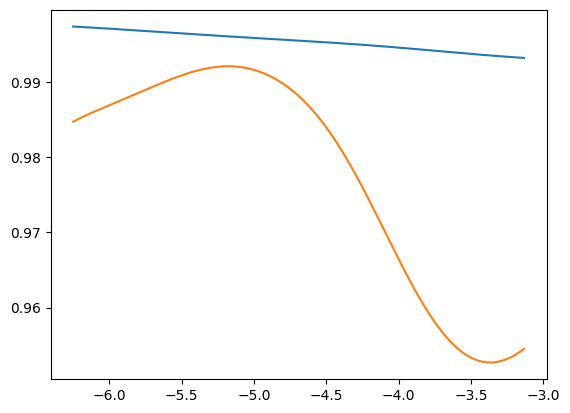

In [48]:
import matplotlib.pyplot as plt
train_score = []
test_score  = []
alpha_list = [10**(i/128) for i in range(-800, -400)]


for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

In [50]:
print(max(test_score))
max_index = test_score.index(max(test_score))
print(max_index)
max_alpha = alpha_list[max_index]
print(max_alpha)

0.9920977230645408
137
6.611690262414816e-06


In [51]:
ridge = Ridge(alpha=max_alpha)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9960704276199235
0.9920977230645408


### 라쏘 회귀

In [60]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)
lasso.score(test_scaled, test_target)
print(lasso.score(train_scaled, train_target))
print(lasso.coef_)
print(np.sum(lasso.coef_==0)) # 42개의 항이 계수가 0이 되었다.

0.989789897208096
[ 0.          0.          0.         95.61184844 11.60230215  0.
 10.5804005   0.         31.51508869  0.         22.30028081  0.
 29.10414951  0.          0.         18.50441438  0.          0.
 41.93702532  0.          0.          0.          0.          0.
  0.          5.74835225  0.          0.          0.         20.53363452
  0.          0.          0.          8.8783085   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         35.3124872   0.          0.          0.
  0.         21.35881131  0.          0.          0.          0.
  0.        ]
42
